In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/world-university-rankings/cwurData.csv')

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv


In [2]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [4]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


**Heatmap**

Text(0.5, 0.98, 'Heatmap')

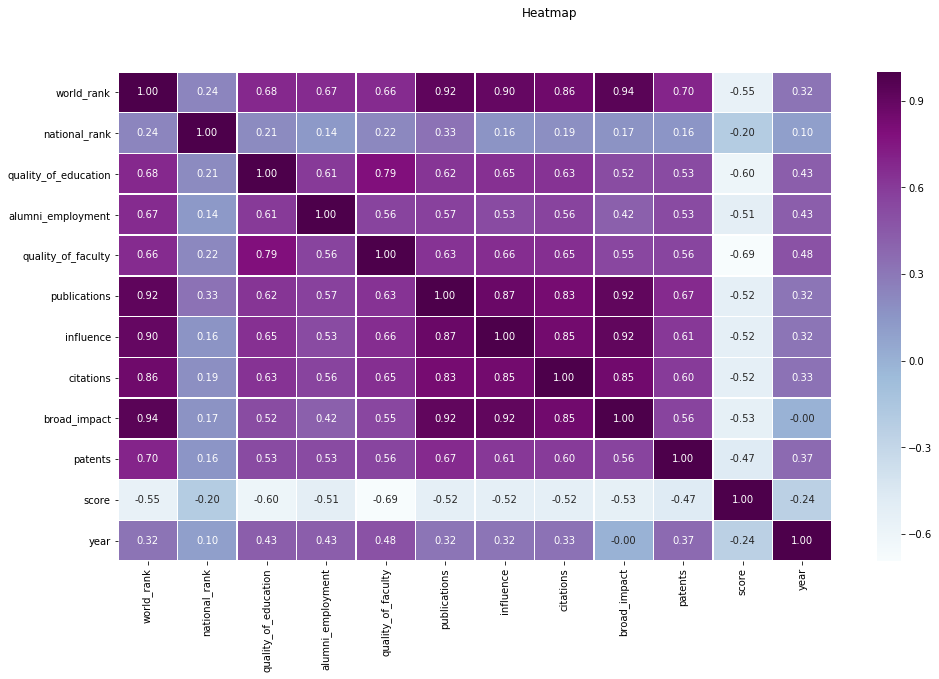

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.2f',cmap='BuPu')
plt.suptitle("Heatmap")

**Scatters**

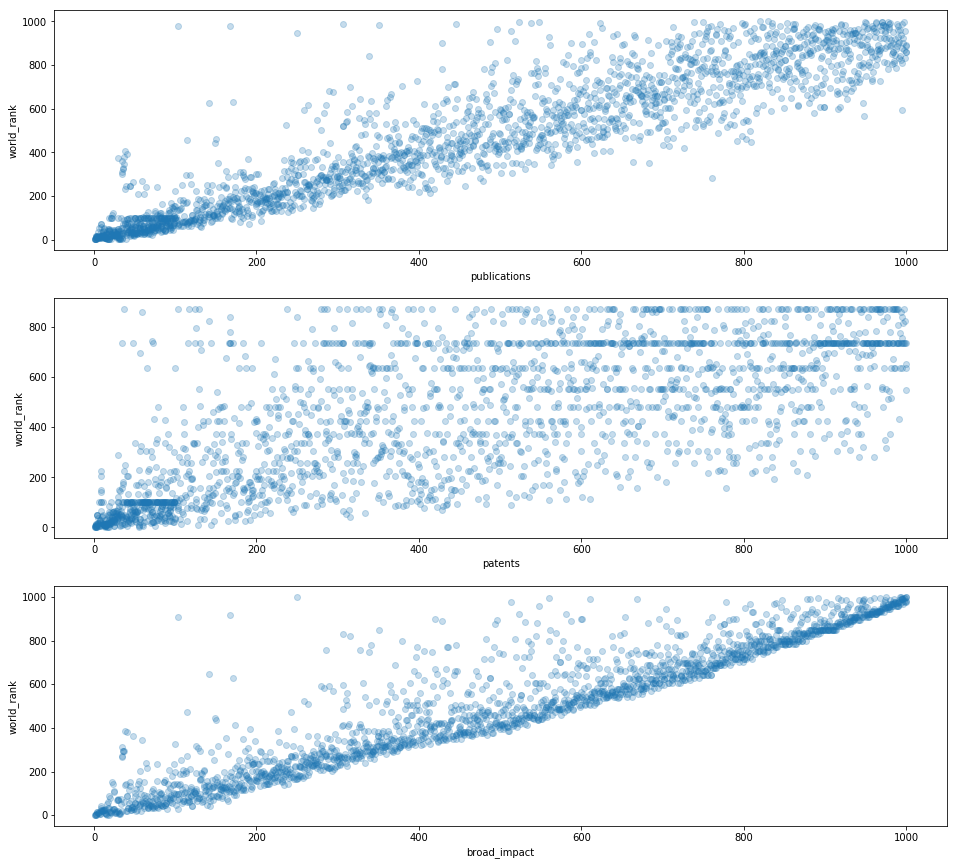

In [6]:
plt.figure(figsize=(16,15))
plt.subplot(3,1,1)
plt.scatter(df['world_rank'],df["publications"],alpha=0.25,cmap='BuPu',edgecolors='face')
plt.xlabel("publications")
plt.ylabel("world_rank")
plt.subplot(3,1,2)
plt.scatter(df['world_rank'],df["patents"],alpha=0.25,cmap='BuPu',edgecolors='face')
plt.xlabel("patents")
plt.ylabel("world_rank")
plt.subplot(3,1,3)
plt.scatter(df['world_rank'],df["broad_impact"],alpha=0.25,cmap='BuPu',edgecolors='face')
plt.xlabel("broad_impact")
plt.ylabel("world_rank")
plt.show()

**Barplot**

In [7]:
from collections import Counter
country_list = list(df['country'])
sorted_d = sorted(Counter(country_list).items() , key=lambda x: x[1],reverse = True)
top_ten = sorted_d[:10]

df_top_ten = pd.DataFrame(top_ten)
df_top_ten.rename(columns={0: "country", 1: "num_univ"},inplace=True)

Text(0.5, 1.0, 'Top ten countries in ranking')

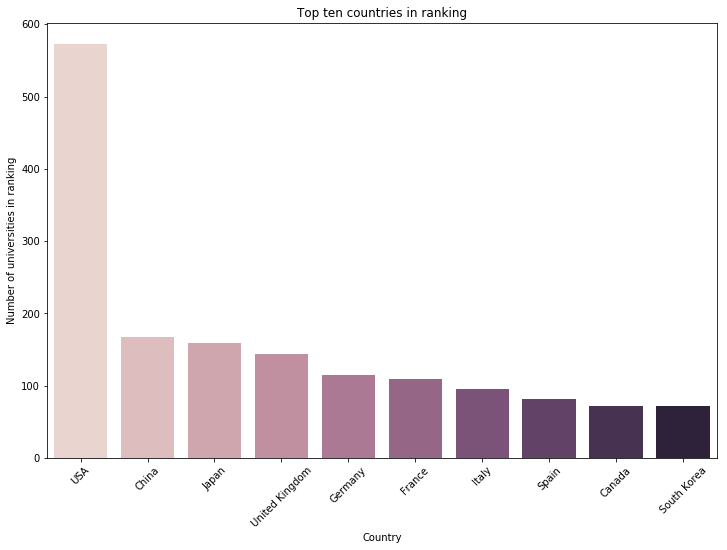

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(x = df_top_ten["country"],y=df_top_ten["num_univ"] ,palette=sns.cubehelix_palette(len(df_top_ten['country'])))
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel('Number of universities in ranking')
plt.title('Top ten countries in ranking')

**Pointplot**

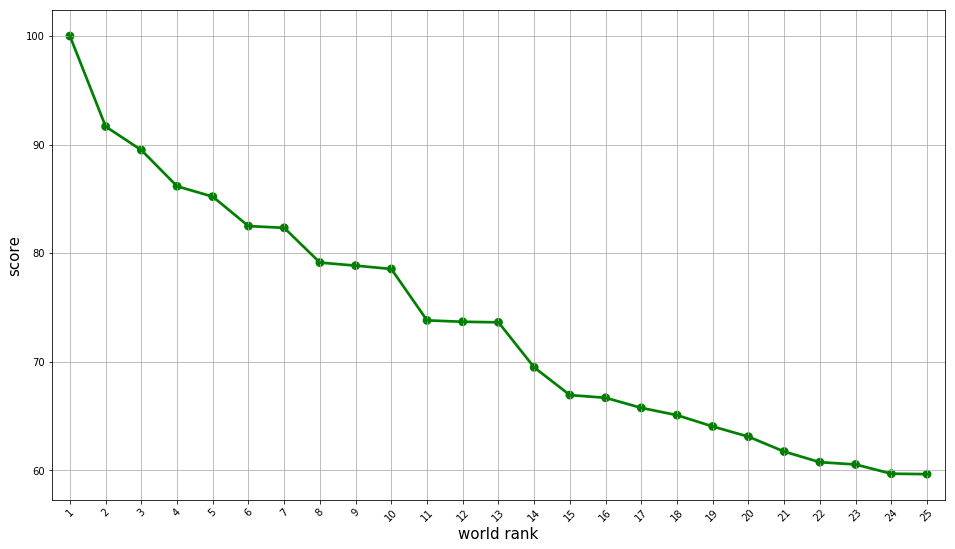

In [9]:
f, ax = plt.subplots(figsize=(16,9))
sns.pointplot(x='world_rank',y='score',data=df[:25],alpha=0.8, color='g' )
plt.xticks(rotation=45)
plt.xlabel("world rank",fontsize=15)
plt.ylabel("score",fontsize=15)
plt.grid()

**Scatter matrix**

In [10]:
df_scatter = df[["quality_of_education","score","quality_of_faculty"]]

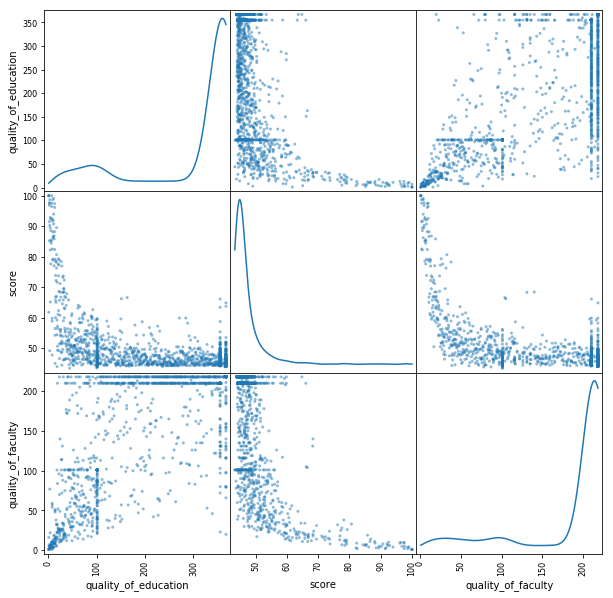

In [11]:
pd.plotting.scatter_matrix(df_scatter, figsize=(10, 10),diagonal='kde',marker = ".")
plt.show()

**Barplot**

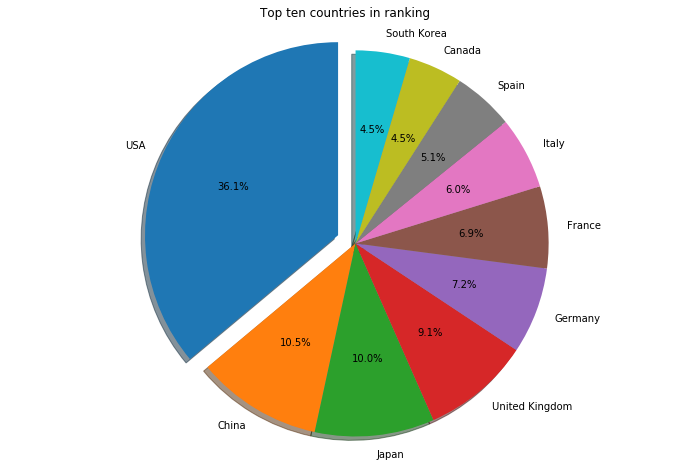

In [12]:
fig1, ax1 = plt.subplots(figsize=(12,8))
explode = np.zeros(len(df_top_ten))
explode[0] = 0.1
ax1.pie(df_top_ten['num_univ'], labels=df_top_ten['country'], autopct='%1.1f%%',shadow=True, startangle=90,explode=explode )
ax1.axis('equal') 
plt.title('Top ten countries in ranking')
plt.show()

**Joinplot**

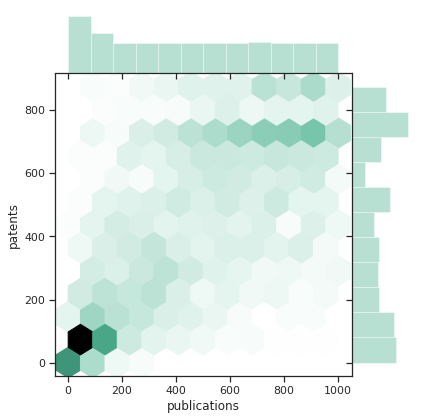

In [13]:
sns.set(style="ticks")
sns.jointplot(df['publications'],df['patents'], kind="hex", color="#4CB391",ratio=5,space=0)

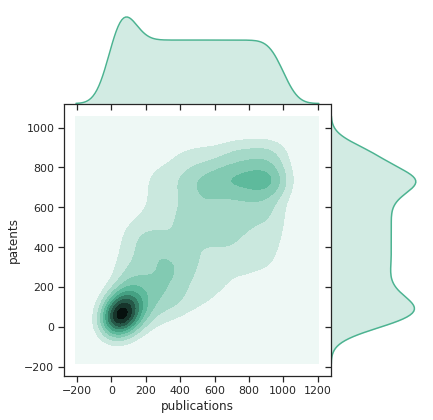

In [14]:
sns.set(style="ticks")
sns.jointplot(df['publications'],df['patents'], kind="kde", color="#4CB391",ratio=3,space=0)

**Boxplot**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f462aba82e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4626a8fc18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f462aba84a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f462a974358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f462a9746d8>],
 'means': []}

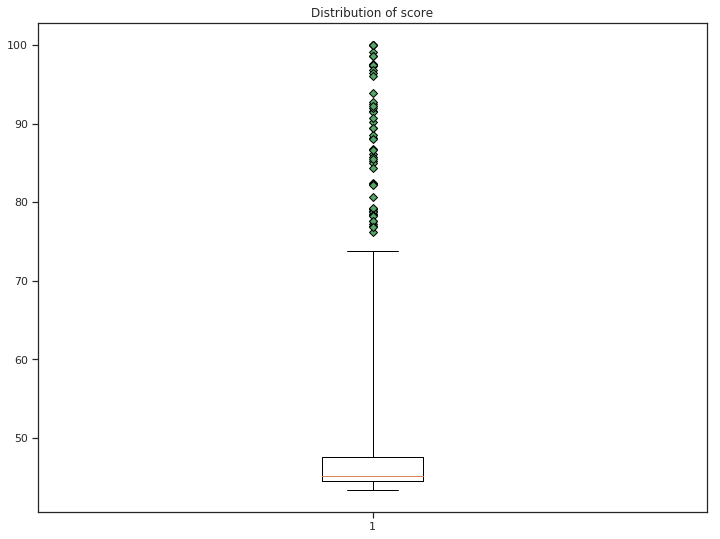

In [15]:
fig1, ax1 = plt.subplots(figsize=(12,9))
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.set_title('Distribution of score')
ax1.boxplot(df['score'], flierprops=green_diamond,whis = 9)


**Violinplot**

Text(0.5, 1.0, 'Distribution of score')

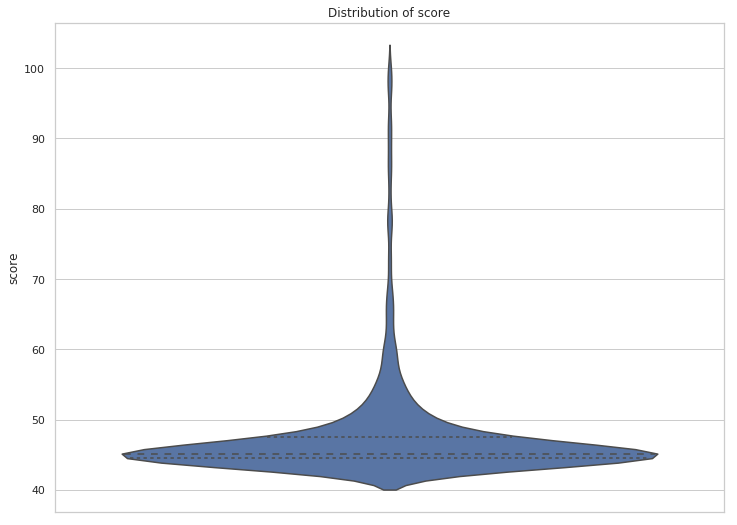

In [16]:
sns.set(style="whitegrid")
ax = plt.subplots(figsize=(12,9))
ax = sns.violinplot(y=df["score"],inner="quartile")
ax.set_title('Distribution of score')

**Scatterplot with continuous hues and sizes**

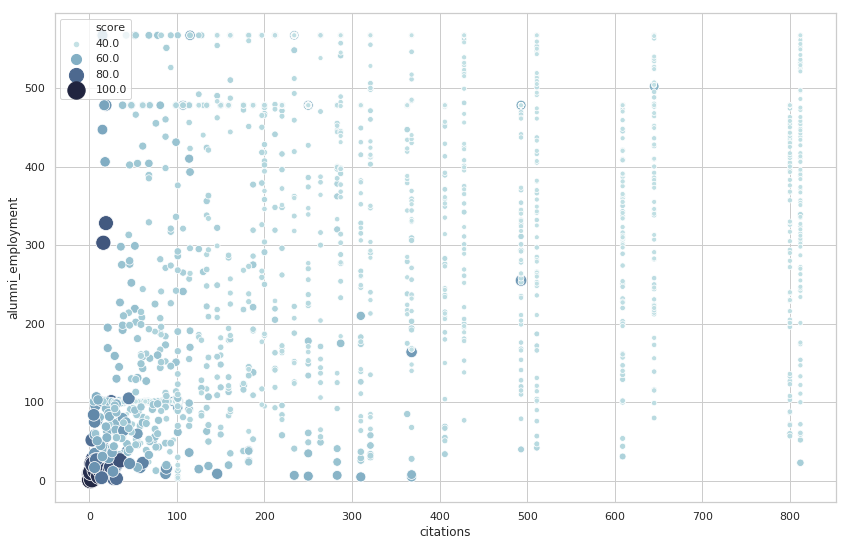

In [17]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = plt.subplots(figsize=(14,9))
ax = sns.scatterplot(x="citations", y="alumni_employment",hue="score",size='score',
                     palette=cmap, sizes=(20, 300),
                     data=df)